## In this notebook, we will analyze african vs songs in the billboard top 100 (Nov 6) and the UK top 40

## Our key questions are:
### There's very few african songs in the top 100, uk top 40 and even winning major awards. Is there a reason for this?
### Can the popularity of the music in the top awards and charts be explained by their features?

In [1]:
#lets connect to the spotify api
import requests

CLIENT_ID="62c97a2ef4a94c2ab4d311398f2ff9b9"
CLIENT_SECRET="c69eb97ac7a04ab1a92b4edf2ae2464a"

In [2]:
#Import all the necessary libraries
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager=SpotifyClientCredentials(CLIENT_ID,CLIENT_SECRET)
sp=spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
#lets read in our grammy awards data first and see what it contains
df=pd.read_csv("grammys.csv")
df.drop(columns="Unnamed: 3")
df.head()

,Track,Artist,Unnamed: 2,Unnamed: 3
0,(Everything I Do) I Do It For You,Bryan Adams,NaN,NaN
1,(I've Had) The Time of My Life,Bill Medley & Jennifer Warnes,NaN,NaN
2,(Sittin' On) The Dock Of The Bay,Otis Redding,NaN,NaN
3,"10,000 Hours",Dan + Shay,NaN,NaN
4,"10,000 Reasons (Bless the Lord)",Matt Redman,NaN,NaN


In [4]:
len(df['Track'])

538

In [17]:
#We have our data.Now we can use it to get saved URI's from spotify
def get_spotify_uris(df):
    saved_ids=[]
    artist_names=df['Artist'].values
    track_names=df['Track'].values

    for i in range(len(artist_names)):
        artist=artist_names[i]
        track=track_names[i]
        q='artist:{} track:{}'.format(artist,track)
        results=sp.search(q=q,limit=1,type='track')
        for item in results['tracks']['items']:
            id=item['id']
        
            saved_ids.append(id)

    return saved_ids

In [18]:
#Lets get the audio features of each track and append it to a pandas dataframe
def get_audio_features(saved_ids):

    artist = []
    track = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    duration_ms = []

    for id in saved_ids:
        x=sp.audio_features(id)
        y=sp.track(id)

        for audio_features in x:
            danceability.append(audio_features['danceability'])
            energy.append(audio_features['energy'])
            key.append(audio_features['key'])
            loudness.append(audio_features['loudness'])
            mode.append(audio_features['mode'])
            speechiness.append(audio_features['speechiness'])
            acousticness.append(audio_features['acousticness'])
            instrumentalness.append(audio_features['instrumentalness'])
            liveness.append(audio_features['liveness'])
            valence.append(audio_features['valence'])
            tempo.append(audio_features['tempo'])
            duration_ms.append(audio_features['duration_ms'])
            print('append')

        artist.append(y['album']['artists'][0]['name'])
        track.append(y['name'])


    df = pd.DataFrame()
    df['artist'] = artist
    df['track'] = track
    df['danceability'] = danceability
    df['energy'] = energy
    df['key'] = key
    df['loudness'] = loudness
    df['mode'] = mode
    df['speechiness'] = speechiness
    df['acousticness'] = acousticness
    df['instrumentalness'] = instrumentalness
    df['liveness'] = liveness
    df['valence'] = valence
    df['tempo'] = tempo
    df['duration_ms'] = duration_ms
    
    df.to_csv('OnelateAudioFeatures.csv')
    
    return df

In [5]:
#Read the african data in
df_african=pd.read_csv("boomplayAfrican.csv")
df_african.head()

,Title,Artist
0,Sip (Alcohol),Joeboy
1,Peru,Fireboy DML
2,love nwantiti (feat. Dj Yo! & AX'EL) (Remix),CKay
3,Lie,Kizz Daniel
4,Naanzaje,Diamond Platnumz


In [6]:
#I want to rename the column labels
df_african=df_african.rename(columns={"Title":"Track"})
df_african.head()

,Track,Artist
0,Sip (Alcohol),Joeboy
1,Peru,Fireboy DML
2,love nwantiti (feat. Dj Yo! & AX'EL) (Remix),CKay
3,Lie,Kizz Daniel
4,Naanzaje,Diamond Platnumz


In [7]:
len(df_african["Track"])

100

In [115]:
#Now that we have the grammy data lets do the same for african data for comparison
def get_spotify_ids_africanSongs(df_african):
    saved_ids=[]
    artist_names=df_african['Artist'].values
    track_names=df_african['Track'].values

    for i in range(len(artist_names)):
        artist=artist_names[i]
        track=track_names[i]
        q='artist:{} track:{}'.format(artist,track)
        results=sp.search(q=q,limit=1,type='track')
        for item in results['tracks']['items']:
            id=item['id']
        
            saved_ids.append(id)

    return saved_ids

In [116]:
#Lets get the audio features of each track and append it to a pandas dataframe
def get_audio_features_african(saved_ids):

    artist = []
    track = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    duration_ms = []

    for id in saved_ids:
        x=sp.audio_features(id)
        y=sp.track(id)

        for audio_features in x:
            danceability.append(audio_features['danceability'])
            energy.append(audio_features['energy'])
            key.append(audio_features['key'])
            loudness.append(audio_features['loudness'])
            mode.append(audio_features['mode'])
            speechiness.append(audio_features['speechiness'])
            acousticness.append(audio_features['acousticness'])
            instrumentalness.append(audio_features['instrumentalness'])
            liveness.append(audio_features['liveness'])
            valence.append(audio_features['valence'])
            tempo.append(audio_features['tempo'])
            duration_ms.append(audio_features['duration_ms'])
            print('append')

        artist.append(y['album']['artists'][0]['name'])
        track.append(y['name'])


    df = pd.DataFrame()
    df['artist'] = artist
    df['track'] = track
    df['danceability'] = danceability
    df['energy'] = energy
    df['key'] = key
    df['loudness'] = loudness
    df['mode'] = mode
    df['speechiness'] = speechiness
    df['acousticness'] = acousticness
    df['instrumentalness'] = instrumentalness
    df['liveness'] = liveness
    df['valence'] = valence
    df['tempo'] = tempo
    df['duration_ms'] = duration_ms
    
    df.to_csv('BoomplayAfricanSongs.csv')
    
    return df

In [117]:
get_audio_features_african(get_spotify_ids_africanSongs(df_african))

append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append


,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Joeboy,Sip (Alcohol),0.812,0.616,10,-7.377,0,0.1740,0.79200,0.000464,0.0971,0.842,99.996,158400
1,Fireboy DML,Peru,0.951,0.415,7,-6.847,0,0.0770,0.57200,0.004030,0.0792,0.633,108.014,151641
2,CKay,love nwantiti (feat. Dj Yo! & AX'EL) - Remix,0.579,0.596,8,-4.823,1,0.0561,0.43600,0.093800,0.0549,0.443,119.900,188369
3,Kizz Daniel,Lie,0.495,0.633,6,-6.675,1,0.2940,0.51100,0.003370,0.0927,0.738,201.726,156600
4,Diamond Platnumz,Naanzaje,0.823,0.732,10,-4.170,1,0.0610,0.43000,0.000000,0.3200,0.795,94.032,199309
5,Omah Lay,Understand,0.697,0.653,0,-7.284,1,0.1020,0.16600,0.231000,0.0911,0.627,99.982,174545
6,Alikiba,Utu,0.469,0.672,6,-7.906,1,0.2090,0.23300,0.004510,0.0741,0.515,59.236,244909
7,Jaywillz,Medicine,0.606,0.795,6,-4.299,0,0.2020,0.28500,0.003510,0.0971,0.650,130.989,159679
8,Ayra Starr,Bloody Samaritan,0.796,0.719,8,-7.018,0,0.1380,0.03600,0.000000,0.0718,0.242,105.027,187000
9,Diamond Platnumz,Gimmie (feat. Rema),0.773,0.714,7,-3.786,0,0.2720,0.23600,0.000000,0.0492,0.912,107.946,162361


In [8]:
#We see that we only get 54 records out of the original 100.
#Lets check out the billboard 100 to compare the african songs with
df_grammys=pd.read_csv("OnelateAudioFeatures.csv")
df_grammys.head()



,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,Bryan Adams,(Everything I Do) I Do It For You,0.526,0.365,1,-12.605,1,0.0280,0.0775,0.000013,0.0618,0.253,131.253,394133
1,1,Otis Redding,(Sittin' On) the Dock of the Bay,0.769,0.367,2,-11.226,1,0.0312,0.6840,0.000016,0.0810,0.535,103.621,163756
2,2,Dan + Shay,"10,000 Hours (with Justin Bieber)",0.654,0.630,10,-4.644,1,0.0259,0.1530,0.000000,0.1110,0.430,89.991,167693
3,3,Matt Redman,"10,000 Reasons (Bless The Lord) - Live",0.431,0.485,7,-8.085,1,0.0274,0.4520,0.000000,0.5440,0.367,145.220,342493
4,4,Jason Isbell,24 Frames,0.568,0.527,4,-10.206,0,0.0249,0.1560,0.000000,0.1360,0.761,104.930,193613


In [9]:
#We need to analyze the data for the grammy's dataset. Lets find the averages for the features we have
df_grammys.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.00000,494.000000,494.000000
mean,246.500000,0.583073,0.589830,5.074899,-8.411836,0.722672,0.069118,0.294350,0.052351,0.183574,0.51531,119.957988,248515.064777
std,142.749781,0.169483,0.224188,3.411063,4.009070,0.448134,0.071807,0.304945,0.173091,0.154853,0.25140,30.476976,76422.808805
min,0.000000,0.000000,0.023500,0.000000,-37.841000,0.000000,0.000000,0.000005,0.000000,0.022300,0.00000,0.000000,77543.000000
25%,123.250000,0.470000,0.437250,2.000000,-10.528750,0.000000,0.031500,0.033750,0.000000,0.087800,0.29975,97.928250,205930.000000
50%,246.500000,0.589500,0.606500,5.000000,-7.597500,1.000000,0.040500,0.162000,0.000018,0.119500,0.50500,117.550500,238580.000000
75%,369.750000,0.704000,0.772750,8.000000,-5.593250,1.000000,0.070775,0.542500,0.001970,0.226750,0.73475,138.442250,280954.750000
max,493.000000,0.949000,0.990000,11.000000,-1.538000,1.000000,0.504000,0.987000,0.918000,0.893000,0.98500,218.101000,943529.000000


## The features used in the analysis are:
### danceability- Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
### energy- Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
### key- The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
### loudness- The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
### mode- Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
### speechiness- Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
### acousticness- A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
### instrumentalness- Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
### liveness- Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
### valence- A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
### tempo- The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
### duration_ms- The duration of the track in milliseconds.

In [10]:
#It seems we dont need the duration of the song to do analysis so we will remove the column
df_grammys=df_grammys.drop(['duration_ms'],axis=1)
df_grammys.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Bryan Adams,(Everything I Do) I Do It For You,0.526,0.365,1,-12.605,1,0.0280,0.0775,0.000013,0.0618,0.253,131.253
1,1,Otis Redding,(Sittin' On) the Dock of the Bay,0.769,0.367,2,-11.226,1,0.0312,0.6840,0.000016,0.0810,0.535,103.621
2,2,Dan + Shay,"10,000 Hours (with Justin Bieber)",0.654,0.630,10,-4.644,1,0.0259,0.1530,0.000000,0.1110,0.430,89.991
3,3,Matt Redman,"10,000 Reasons (Bless The Lord) - Live",0.431,0.485,7,-8.085,1,0.0274,0.4520,0.000000,0.5440,0.367,145.220
4,4,Jason Isbell,24 Frames,0.568,0.527,4,-10.206,0,0.0249,0.1560,0.000000,0.1360,0.761,104.930


In [11]:
#We have used the describe function to try and get measures of central tendency and dispersion
# like mean, median etc
#The measures could be on different scales. So we need to normalize the features to reduce biases and 
# increase our chances at measuring descriptive stats correctly
# We will normalize use a scaling technique  in which values are shifted and rescaled so that they end up ranging between 0 and 1


music_features=df_grammys[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

music_features.describe()



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.00000,494.000000
mean,0.583073,0.589830,-8.411836,0.069118,0.294350,0.052351,0.183574,0.51531,119.957988
std,0.169483,0.224188,4.009070,0.071807,0.304945,0.173091,0.154853,0.25140,30.476976
min,0.000000,0.023500,-37.841000,0.000000,0.000005,0.000000,0.022300,0.00000,0.000000
25%,0.470000,0.437250,-10.528750,0.031500,0.033750,0.000000,0.087800,0.29975,97.928250
50%,0.589500,0.606500,-7.597500,0.040500,0.162000,0.000018,0.119500,0.50500,117.550500
75%,0.704000,0.772750,-5.593250,0.070775,0.542500,0.001970,0.226750,0.73475,138.442250
max,0.949000,0.990000,-1.538000,0.504000,0.987000,0.918000,0.893000,0.98500,218.101000


In [12]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()

music_features.loc[:]=min_max_scaler.fit_transform(music_features.loc[:])
music_features.head()

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.554268,0.353337,0.695149,0.055556,0.078516,0.000015,0.045366,0.256853,0.601799
1,0.810327,0.355406,0.733135,0.061905,0.693007,0.000018,0.067417,0.543147,0.475106
2,0.689146,0.627522,0.914442,0.051389,0.155011,0.000000,0.101872,0.436548,0.412612
3,0.454162,0.477496,0.819657,0.054365,0.457950,0.000000,0.599173,0.372589,0.665838
4,0.598525,0.520952,0.761232,0.049405,0.158050,0.000000,0.130585,0.772589,0.481107


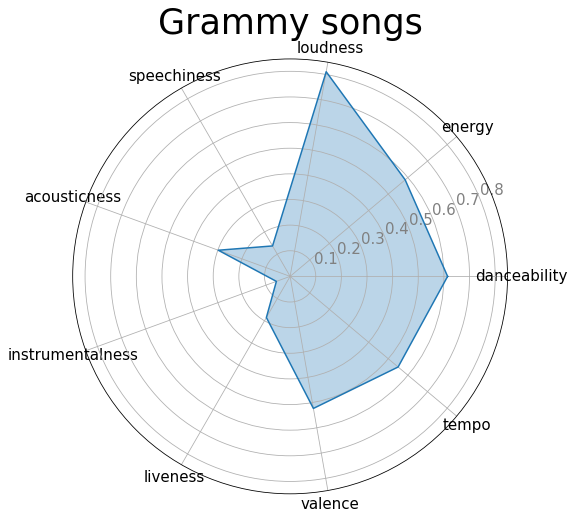

In [29]:
# plot size
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_features.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*np.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

plt.title('Grammy songs', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

In [13]:
#Now lets compare the grammy data with top 100 african songs from the boomplay app
#Lets read the data in
df_african=pd.read_csv("BoomplayAfricanSongs.csv")
df_african.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,Joeboy,Sip (Alcohol),0.812,0.616,10,-7.377,0,0.1740,0.792,0.000464,0.0971,0.842,99.996,158400
1,1,Fireboy DML,Peru,0.951,0.415,7,-6.847,0,0.0770,0.572,0.004030,0.0792,0.633,108.014,151641
2,2,CKay,love nwantiti (feat. Dj Yo! & AX'EL) - Remix,0.579,0.596,8,-4.823,1,0.0561,0.436,0.093800,0.0549,0.443,119.900,188369
3,3,Kizz Daniel,Lie,0.495,0.633,6,-6.675,1,0.2940,0.511,0.003370,0.0927,0.738,201.726,156600
4,4,Diamond Platnumz,Naanzaje,0.823,0.732,10,-4.170,1,0.0610,0.430,0.000000,0.3200,0.795,94.032,199309


In [ ]:
#Not all the songs were in the spotify database. we have 54 out of 100
#let us now normalize and check out the audio features for the african dataset

In [14]:
#lets now visualize the stats for the african dataset
music_features_african=df_african[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

music_features_african.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.722680,0.674360,-5.808640,0.135022,0.332610,0.036507,0.133944,0.671120,122.987300
std,0.113489,0.137942,2.012908,0.106460,0.253894,0.117292,0.086040,0.167867,35.549928
min,0.469000,0.297000,-11.810000,0.034500,0.014000,0.000000,0.028700,0.242000,59.236000
25%,0.642000,0.626750,-7.077250,0.053475,0.123750,0.000000,0.081650,0.558250,99.951250
50%,0.736500,0.697500,-5.425500,0.077400,0.247000,0.000055,0.101500,0.662000,107.578000
75%,0.807000,0.757000,-4.394250,0.200250,0.507000,0.003577,0.145000,0.753750,139.423750
max,0.951000,0.959000,-2.386000,0.432000,0.972000,0.618000,0.366000,0.966000,201.726000


In [15]:
#this code will normalize the audio features
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()

music_features_african.loc[:]=min_max_scaler.fit_transform(music_features_african.loc[:])
music_features_african.head()

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.711618,0.481873,0.470395,0.350943,0.812109,0.000751,0.202787,0.828729,0.286055
1,1.000000,0.178248,0.526634,0.106918,0.582463,0.006521,0.149718,0.540055,0.342326
2,0.228216,0.451662,0.741405,0.054340,0.440501,0.151780,0.077676,0.277624,0.425742
3,0.053942,0.507553,0.544885,0.652830,0.518789,0.005453,0.189742,0.685083,1.000000
4,0.734440,0.657100,0.810696,0.066667,0.434238,0.000000,0.863623,0.763812,0.244200


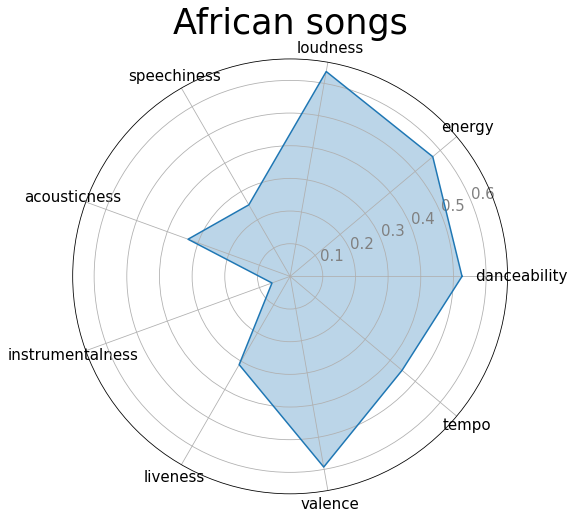

In [14]:
# plot size
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_african.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_features_african.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*np.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

plt.title('African songs', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

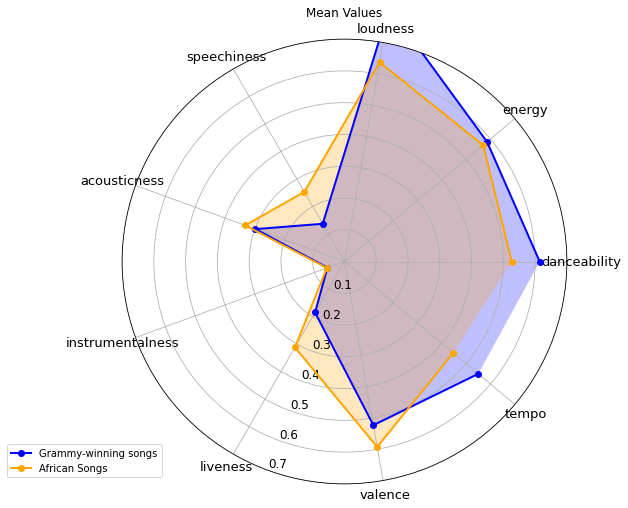

In [15]:
#Are there any differences between the african songs and grammy award winning songs from the spotify features?
# plot size
import matplotlib.pyplot as plt
import numpy as np

# fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_african.columns)
# number of categories
N=len(categories)
#get the average features
features_african=music_features_african.mean().to_list()
features_grammy=music_features.mean().to_list()

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
# angles=[n/float(N)*2*np.pi for n in range(N)]
# angles+=angles[:1]
angles=np.linspace(0,2*np.pi,N,endpoint=False)
fig=plt.figure(figsize=(18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features_grammy, 'o-', linewidth=2, label = "Grammy-winning songs", color= 'blue')
ax.fill(angles, features_grammy, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, categories , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_african, 'o-', linewidth=2, label = "African Songs", color= 'orange')
ax.fill(angles, features_african, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

<ipython-input-17-b33130f26d38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_features_african['ix']=0
<ipython-input-17-b33130f26d38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_features['ix']=1
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead

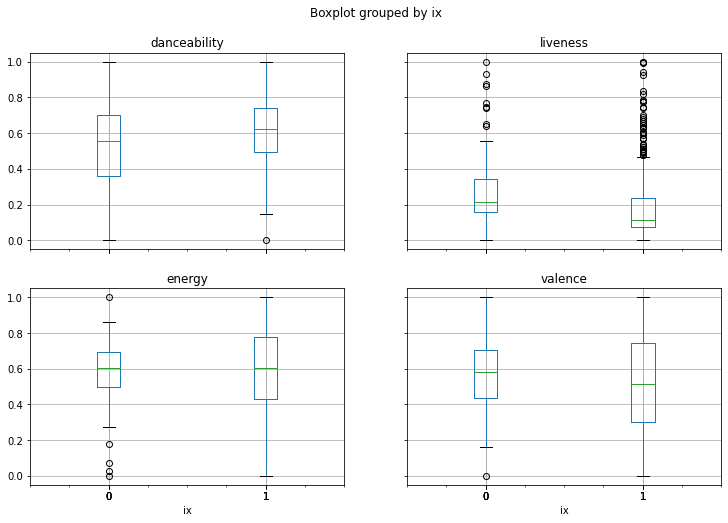

In [17]:
#the datasets have different features but how big are the differences?
#Let us drill down and explore some more
%matplotlib inline

music_features_african['ix']=0
music_features['ix']=1
data=[music_features,music_features_african]

dt=pd.concat(data)
ax=fig.add_axes([0,0,1,1])
bp=dt.boxplot(['danceability','liveness','energy','valence'],by='ix',figsize=(12,8))
plt.show()

In [175]:
# There's a lot of analysis we can do on the differences between the datasets including correlation
# between the features, significance of the differences between the features, lyrics data
# and much more

In [ ]:
#Let us first check similarities between the data.Are there songs in the african dataset that sound
#are similar to songs in the grammy dataset?
import networkx as nx 
from scipy import spatial

list_songs=df_grammys.sample(n=50)
dict_edges={}
for i in range(len(list_songs)):
    list_val=[]
    for j in range(i):
        a_row=list(df_african.iloc[j])
        list_val.append([j, 1 - spatial.distance.cosine(df_african.iloc[i], a_row),list(list_songs.iloc[j])[1] ])

    for j in range(i+1,len(list_songs)):    
        a_row = list(df_african.iloc[j])
        list_val.append([j, 1 - spatial.distance.cosine(df_african.iloc[i], a_row), list(list_songs.iloc[j])[1]])
    dict_edges[i] = list_val 

new_dict = {}
for i in range(100):
    list_to_put = []
    for j in range(len(dict_edges[i])):
        if dict_edges[i][j][1] >= 0.95:
            list_to_put.append(dict_edges[i][j])      
    new_dict[i] = list_to_put

G = nx.Graph()
for i in range(100):
    for j in range(len(new_dict[i])):
        G.add_node(i,label = i)
        G.add_edge(i, new_dict[i][j][0], weight=new_dict[i][j][1], title = new_dict[i][j][2])

In [16]:
#we cant do lyric comparison because of the difference in languages
#can we observe these same differences with other african songs
df_mdundo=pd.read_csv("mdundoAfrican.csv")
df_mdundo.head()

,Artist,Track
0,Daddy Lumba,Merensei Da
1,Daddy Lumba,Ye Nea Woho Beto Wo
2,Barakah The Prince,Nivumilie
3,Amakye Dede,Sufre Wo Nyame
4,Free Beats Instrumentals,Amapiano Beat 2


In [40]:
def get_spotify_ids_africanSongs_mdundo(df):
    saved_ids=[]
    artist_names=df_mdundo['Artist'].values
    track_names=df_mdundo['Track'].values

    for i in range(len(artist_names)):
        artist=artist_names[i]
        track=track_names[i]
        q='artist:{} track:{}'.format(artist,track)
        results=sp.search(q=q,limit=1,type='track')
        for item in results['tracks']['items']:
            id=item['id']
        
            saved_ids.append(id)

    return saved_ids

In [41]:
get_spotify_ids_africanSongs_mdundo(df_mdundo)

['1Xj8Q1uRoRhTsuJQK2afxT',
 '3cuJNLDrh5bVxf5Y4vdQps',
 '1g0Vdmk2o7c4pENDEZRIlO',
 '1rHnVWMyLpjCBqgnligr8g',
 '3dsHT4ULVJs56t40CRuBUO',
 '42RaLdeJlunFOAyyrTBgaa',
 '0IpDABG14RT8lwpzbnhtxC',
 '66e3PI32YFAtjWS6JckXW7',
 '19qnjC9LlxL2Q6TMrxbZL1',
 '1lxayTHLhRLvZnv9oFNcyb',
 '0m9YIA1SjZzcmIg7gpItuG']

In [42]:
#Lets get the audio features of each track and append it to a pandas dataframe
def get_audio_features(saved_ids):

    artist = []
    track = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    duration_ms = []

    for id in saved_ids:
        x=sp.audio_features(id)
        y=sp.track(id)

        for audio_features in x:
            danceability.append(audio_features['danceability'])
            energy.append(audio_features['energy'])
            key.append(audio_features['key'])
            loudness.append(audio_features['loudness'])
            mode.append(audio_features['mode'])
            speechiness.append(audio_features['speechiness'])
            acousticness.append(audio_features['acousticness'])
            instrumentalness.append(audio_features['instrumentalness'])
            liveness.append(audio_features['liveness'])
            valence.append(audio_features['valence'])
            tempo.append(audio_features['tempo'])
            duration_ms.append(audio_features['duration_ms'])
            print('append')

        artist.append(y['album']['artists'][0]['name'])
        track.append(y['name'])


    df = pd.DataFrame()
    df['artist'] = artist
    df['track'] = track
    df['danceability'] = danceability
    df['energy'] = energy
    df['key'] = key
    df['loudness'] = loudness
    df['mode'] = mode
    df['speechiness'] = speechiness
    df['acousticness'] = acousticness
    df['instrumentalness'] = instrumentalness
    df['liveness'] = liveness
    df['valence'] = valence
    df['tempo'] = tempo
    df['duration_ms'] = duration_ms
    
    df.to_csv('mdundoSongs.csv')
    
    return df

In [43]:
get_audio_features(get_spotify_ids_africanSongs_mdundo(df_mdundo))

append
append
append
append
append
append
append
append
append
append
append


,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Barakah The Prince,Nivumilie,0.783,0.6650,5,-7.749,0,0.0548,0.0636,0.000693,0.0997,0.805,100.494,270761
1,Pallaso,Mama,0.710,0.8830,11,-3.556,1,0.1420,0.3990,0.000000,0.0470,0.880,103.934,237767
2,Instrumental Hip Hop Beats Gang,Slow and smooth,0.825,0.0753,3,-10.373,1,0.1410,0.3580,0.928000,0.1100,0.155,159.524,76984
3,Eddy Kenzo,Mbakooye,0.536,0.8850,11,-3.262,1,0.0666,0.6500,0.000000,0.0958,0.833,174.020,340400
4,Ultra Beats,Latino (Instrumental),0.732,0.3690,7,-10.568,1,0.1260,0.0990,0.782000,0.1020,0.852,89.990,194667
5,Pallaso,Mama Bulamu,0.781,0.7340,6,-3.965,1,0.0574,0.4350,0.000000,0.1370,0.879,101.010,297247
6,Shakira Shakiraa,Bwentyo Bwendi,0.490,0.9070,7,-4.197,0,0.0968,0.0139,0.000000,0.2610,0.833,106.940,202376
7,Brown Mauzo,Natamani,0.748,0.9450,7,-4.998,1,0.2540,0.2320,0.000002,0.1520,0.865,107.995,225504
8,A Pass,Tulo,0.648,0.7520,1,-6.249,0,0.1580,0.0896,0.001070,0.1300,0.581,179.868,150667
9,Pastor T.L. Barrett and the Youth for Christ C...,I Want To Be In Love,0.451,0.8470,5,-5.203,1,0.0613,0.4660,0.000000,0.1310,0.704,92.863,185747


In [17]:
df_mdundo_features=pd.read_csv("mdundoSongs.csv")
df_mdundo_features.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,Barakah The Prince,Nivumilie,0.783,0.6650,5,-7.749,0,0.0548,0.0636,0.000693,0.0997,0.805,100.494,270761
1,1,Pallaso,Mama,0.710,0.8830,11,-3.556,1,0.1420,0.3990,0.000000,0.0470,0.880,103.934,237767
2,2,Instrumental Hip Hop Beats Gang,Slow and smooth,0.825,0.0753,3,-10.373,1,0.1410,0.3580,0.928000,0.1100,0.155,159.524,76984
3,3,Eddy Kenzo,Mbakooye,0.536,0.8850,11,-3.262,1,0.0666,0.6500,0.000000,0.0958,0.833,174.020,340400
4,4,Ultra Beats,Latino (Instrumental),0.732,0.3690,7,-10.568,1,0.1260,0.0990,0.782000,0.1020,0.852,89.990,194667


In [46]:
len(df_mdundo_features['track'])

11

In [18]:
top100=pd.read_csv("tracks.csv")
top100.head()

,Unnamed: 0,Track,Artist
0,1,God Bless the Woman,Lucky Dube
1,2,Alone,Philly Bongoley Lutaaya
2,3,Mario,Franco
3,4,Think About the Children,Lucky Dube
4,5,Pata Pata,Miriam Makeba


In [10]:
def get_spotify_ids_top100African(df):
    saved_ids=[]
    artist_names=top100['Artist'].values
    track_names=top100['Track'].values

    for i in range(len(artist_names)):
        artist=artist_names[i]
        track=track_names[i]
        q='artist:{} track:{}'.format(artist,track)
        results=sp.search(q=q,limit=1,type='track')
        for item in results['tracks']['items']:
            id=item['id']
        
            saved_ids.append(id)

    return saved_ids

In [12]:
#Lets get the audio features of each track and append it to a pandas dataframe
def get_audio_features(saved_ids):

    artist = []
    track = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    duration_ms = []

    for id in saved_ids:
        x=sp.audio_features(id)
        y=sp.track(id)

        for audio_features in x:
            danceability.append(audio_features['danceability'])
            energy.append(audio_features['energy'])
            key.append(audio_features['key'])
            loudness.append(audio_features['loudness'])
            mode.append(audio_features['mode'])
            speechiness.append(audio_features['speechiness'])
            acousticness.append(audio_features['acousticness'])
            instrumentalness.append(audio_features['instrumentalness'])
            liveness.append(audio_features['liveness'])
            valence.append(audio_features['valence'])
            tempo.append(audio_features['tempo'])
            duration_ms.append(audio_features['duration_ms'])
            print('append')

        artist.append(y['album']['artists'][0]['name'])
        track.append(y['name'])


    df = pd.DataFrame()
    df['artist'] = artist
    df['track'] = track
    df['danceability'] = danceability
    df['energy'] = energy
    df['key'] = key
    df['loudness'] = loudness
    df['mode'] = mode
    df['speechiness'] = speechiness
    df['acousticness'] = acousticness
    df['instrumentalness'] = instrumentalness
    df['liveness'] = liveness
    df['valence'] = valence
    df['tempo'] = tempo
    df['duration_ms'] = duration_ms
    
    df.to_csv('top100AfricanSongs.csv')
    
    return df

In [13]:
get_audio_features(get_spotify_ids_top100African(top100))

append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append


,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Philly Bongoley Lutaaya,Alone,0.501,0.569,5,-8.438,1,0.0279,0.6140,0.000006,0.1520,0.403,144.064,400000
1,Franco,Mario (Non stop),0.597,0.674,10,-9.940,0,0.1080,0.3720,0.000000,0.1070,0.826,114.928,862040
2,Lucky Dube,Think About the Children,0.900,0.559,11,-6.540,1,0.0421,0.4780,0.000000,0.0637,0.873,137.082,263080
3,Miriam Makeba,Pata Pata - Stereo Version,0.823,0.800,8,-7.198,1,0.0419,0.6140,0.000000,0.0934,0.969,126.315,180174
4,PJ Powers,There Is an Answer,0.694,0.453,11,-10.717,1,0.0397,0.0132,0.000000,0.0464,0.945,88.953,223453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Oliver Mtukudzi,Ndakuvara,0.759,0.805,1,-7.693,0,0.0317,0.6260,0.000650,0.0964,0.908,109.936,298680
69,Various Artists,Yeke Yeke,0.668,0.926,8,-5.121,1,0.0449,0.0749,0.007870,0.3010,0.556,125.808,237373
70,Mahlathini & The Mahotella Queens,Gazette (Kazet),0.741,0.859,8,-9.229,1,0.0395,0.4980,0.006220,0.3940,0.922,101.214,246667
71,Cesária Evora,Sodade,0.575,0.430,8,-13.168,1,0.0363,0.8220,0.000661,0.1150,0.427,82.691,293640


In [19]:
top100_audioFeatures=pd.read_csv("top100AfricanSongs.csv")
top100_audioFeatures.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,Philly Bongoley Lutaaya,Alone,0.501,0.569,5,-8.438,1,0.0279,0.6140,0.000006,0.1520,0.403,144.064,400000
1,1,Franco,Mario (Non stop),0.597,0.674,10,-9.940,0,0.1080,0.3720,0.000000,0.1070,0.826,114.928,862040
2,2,Lucky Dube,Think About the Children,0.900,0.559,11,-6.540,1,0.0421,0.4780,0.000000,0.0637,0.873,137.082,263080
3,3,Miriam Makeba,Pata Pata - Stereo Version,0.823,0.800,8,-7.198,1,0.0419,0.6140,0.000000,0.0934,0.969,126.315,180174
4,4,PJ Powers,There Is an Answer,0.694,0.453,11,-10.717,1,0.0397,0.0132,0.000000,0.0464,0.945,88.953,223453


In [20]:
top100_audioFeatures=top100_audioFeatures.drop(['duration_ms'],axis=1)

In [21]:
#We have used the describe function to try and get measures of central tendency and dispersion
# like mean, median etc
#The measures could be on different scales. So we need to normalize the features to reduce biases and 
# increase our chances at measuring descriptive stats correctly
# We will normalize use a scaling technique  in which values are shifted and rescaled so that they end up ranging between 0 and 1


music_features_top100=top100_audioFeatures[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

music_features_top100.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.00000,73.000000
mean,0.659301,0.647014,-9.607192,0.063607,0.361468,0.037734,0.177421,0.76026,118.669575
std,0.113959,0.168983,3.007956,0.053353,0.273804,0.109827,0.153814,0.20983,27.711227
min,0.239000,0.250000,-17.013000,0.027900,0.013200,0.000000,0.028200,0.13600,74.141000
25%,0.569000,0.506000,-11.796000,0.036300,0.137000,0.000000,0.079600,0.63600,101.214000
50%,0.675000,0.674000,-9.214000,0.049300,0.232000,0.000376,0.110000,0.84500,111.542000
75%,0.739000,0.773000,-7.484000,0.065000,0.614000,0.007780,0.260000,0.91700,126.315000
max,0.900000,0.974000,-0.737000,0.413000,0.947000,0.559000,0.706000,0.97100,191.830000


In [22]:
#this code will normalize the audio features
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()

music_features_top100.loc[:]=min_max_scaler.fit_transform(music_features_top100.loc[:])
music_features_top100.head()

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.396369,0.440608,0.526849,0.000000,0.643393,0.00001,0.182650,0.319760,0.594134
1,0.541604,0.585635,0.434566,0.207998,0.384236,0.00000,0.116258,0.826347,0.346566
2,1.000000,0.426796,0.643463,0.036874,0.497751,0.00000,0.052375,0.882635,0.534808
3,0.883510,0.759669,0.603035,0.036354,0.643393,0.00000,0.096194,0.997605,0.443321
4,0.688351,0.280387,0.386827,0.030641,0.000000,0.00000,0.026852,0.968862,0.125857


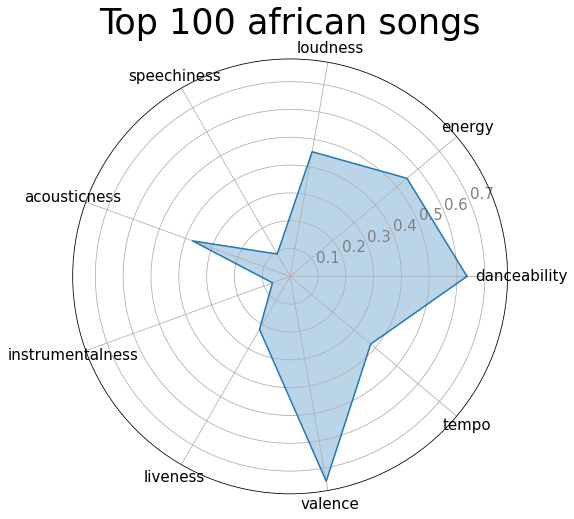

In [24]:
# plot size
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_top100.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_features_top100.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*np.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

plt.title('Top 100 african songs', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

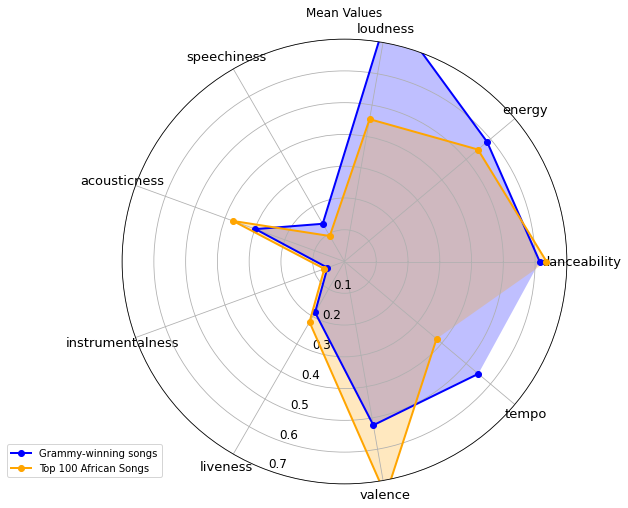

In [30]:
#Are there any differences between the african songs and grammy award winning songs from the spotify features?
# plot size
import matplotlib.pyplot as plt
import numpy as np

# fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_top100.columns)
# number of categories
N=len(categories)
#get the average features
features_african=music_features_top100.mean().to_list()
features_grammy=music_features.mean().to_list()

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
# angles=[n/float(N)*2*np.pi for n in range(N)]
# angles+=angles[:1]
angles=np.linspace(0,2*np.pi,N,endpoint=False)
fig=plt.figure(figsize=(18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features_grammy, 'o-', linewidth=2, label = "Grammy-winning songs", color= 'blue')
ax.fill(angles, features_grammy, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, categories , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_african, 'o-', linewidth=2, label = "Top 100 African Songs", color= 'orange')
ax.fill(angles, features_african, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

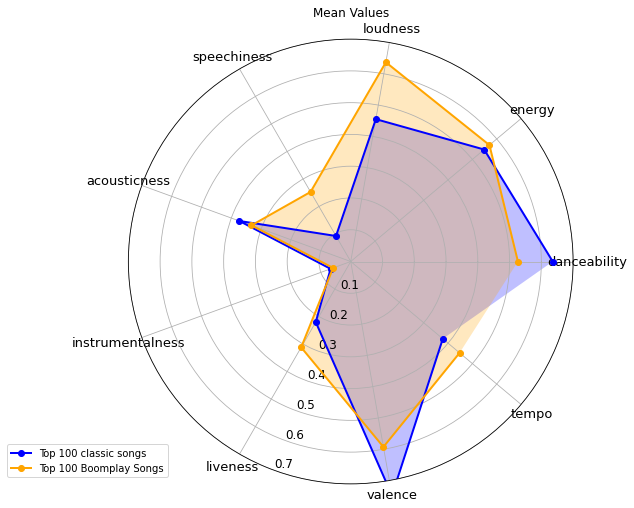

In [34]:
#Are there any differences between the african songs and grammy award winning songs from the spotify features?
# plot size
import matplotlib.pyplot as plt
import numpy as np

# fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_top100.columns)
# number of categories
N=len(categories)
#get the average features
features_top100=music_features_top100.mean().to_list()
features_boomplay=music_features_african.mean().to_list()

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
# angles=[n/float(N)*2*np.pi for n in range(N)]
# angles+=angles[:1]
angles=np.linspace(0,2*np.pi,N,endpoint=False)
fig=plt.figure(figsize=(18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features_top100, 'o-', linewidth=2, label = "Top 100 classic songs", color= 'blue')
ax.fill(angles, features_top100, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, categories , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_boomplay, 'o-', linewidth=2, label = "Top 100 Boomplay Songs", color= 'orange')
ax.fill(angles, features_boomplay, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [23]:
billboard_100=pd.read_csv("Top100.csv")
billboard_100.head()

,Track,Artist
0,Easy On Me,Adele
1,Stay,The Kid LAROI & Justin Bieber
2,Industry Baby,Lil Nas X & Jack Harlow
3,Fancy Like,Walker Hayes
4,Bad Habits,Ed Sheeran


In [36]:
def get_spotify_ids_billbaord(df):
    saved_ids=[]
    artist_names=billboard_100['Artist'].values
    track_names=billboard_100['Track'].values

    for i in range(len(artist_names)):
        artist=artist_names[i]
        track=track_names[i]
        q='artist:{} track:{}'.format(artist,track)
        results=sp.search(q=q,limit=1,type='track')
        for item in results['tracks']['items']:
            id=item['id']
        
            saved_ids.append(id)

    return saved_ids

In [37]:
#Lets get the audio features of each track and append it to a pandas dataframe
def get_audio_features(saved_ids):

    artist = []
    track = []
    danceability = []
    energy = []
    key = []
    loudness = []
    mode = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    duration_ms = []

    for id in saved_ids:
        x=sp.audio_features(id)
        y=sp.track(id)

        for audio_features in x:
            danceability.append(audio_features['danceability'])
            energy.append(audio_features['energy'])
            key.append(audio_features['key'])
            loudness.append(audio_features['loudness'])
            mode.append(audio_features['mode'])
            speechiness.append(audio_features['speechiness'])
            acousticness.append(audio_features['acousticness'])
            instrumentalness.append(audio_features['instrumentalness'])
            liveness.append(audio_features['liveness'])
            valence.append(audio_features['valence'])
            tempo.append(audio_features['tempo'])
            duration_ms.append(audio_features['duration_ms'])
            print('append')

        artist.append(y['album']['artists'][0]['name'])
        track.append(y['name'])


    df = pd.DataFrame()
    df['artist'] = artist
    df['track'] = track
    df['danceability'] = danceability
    df['energy'] = energy
    df['key'] = key
    df['loudness'] = loudness
    df['mode'] = mode
    df['speechiness'] = speechiness
    df['acousticness'] = acousticness
    df['instrumentalness'] = instrumentalness
    df['liveness'] = liveness
    df['valence'] = valence
    df['tempo'] = tempo
    df['duration_ms'] = duration_ms
    
    df.to_csv('billboard100.csv')
    
    return df

In [38]:
get_audio_features(get_spotify_ids_billbaord(billboard_100))

append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append
append


,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Adele,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.57800,0.000000,0.1330,0.130,141.981,224695
1,Walker Hayes,Fancy Like,0.649,0.760,1,-6.487,1,0.0574,0.11400,0.000000,0.3170,0.843,80.018,161853
2,Ed Sheeran,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.04690,0.000031,0.3640,0.591,126.026,231041
3,Ed Sheeran,Shivers,0.788,0.859,2,-2.724,1,0.0856,0.28100,0.000000,0.0424,0.822,141.020,207853
4,Olivia Rodrigo,good 4 u,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Jonas Brothers,Who's In Your Head,0.704,0.778,5,-5.331,1,0.0971,0.00447,0.000000,0.0731,0.821,101.025,183537
60,Priscilla Block,Just About Over You,0.530,0.524,4,-5.751,1,0.0327,0.54400,0.000000,0.1100,0.514,150.050,179214
61,Parker McCollum,To Be Loved By You,0.473,0.802,10,-4.497,1,0.0370,0.00036,0.000000,0.3040,0.453,145.983,198324
62,Oliver Tree,Life Goes On,0.700,0.490,0,-5.187,1,0.0760,0.18600,0.000000,0.1170,0.569,79.982,161803


In [24]:
billboard_100=pd.read_csv("billboard100.csv")
billboard_100=billboard_100.drop(['duration_ms'],axis=1)
billboard_100.head()

,Unnamed: 0,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Adele,Easy On Me,0.604,0.366,5,-7.519,1,0.0282,0.5780,0.000000,0.1330,0.130,141.981
1,1,Walker Hayes,Fancy Like,0.649,0.760,1,-6.487,1,0.0574,0.1140,0.000000,0.3170,0.843,80.018
2,2,Ed Sheeran,Bad Habits,0.808,0.897,11,-3.712,0,0.0348,0.0469,0.000031,0.3640,0.591,126.026
3,3,Ed Sheeran,Shivers,0.788,0.859,2,-2.724,1,0.0856,0.2810,0.000000,0.0424,0.822,141.020
4,4,Olivia Rodrigo,good 4 u,0.563,0.664,9,-5.044,1,0.1540,0.3350,0.000000,0.0849,0.688,166.928


In [25]:
#We have used the describe function to try and get measures of central tendency and dispersion
# like mean, median etc
#The measures could be on different scales. So we need to normalize the features to reduce biases and 
# increase our chances at measuring descriptive stats correctly
# We will normalize use a scaling technique  in which values are shifted and rescaled so that they end up ranging between 0 and 1


music_features_billboard=billboard_100[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

music_features_billboard.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.665422,0.652906,-6.289062,0.106186,0.194863,0.000477,0.164311,0.518248,118.346313
std,0.142340,0.158919,2.254806,0.116048,0.215793,0.002504,0.109876,0.236120,30.801994
min,0.332000,0.184000,-17.667000,0.024400,0.000360,0.000000,0.042400,0.084900,69.877000
25%,0.585750,0.537000,-7.243000,0.034800,0.026050,0.000000,0.098800,0.345250,91.841750
50%,0.665000,0.665500,-6.074500,0.056300,0.104550,0.000000,0.118000,0.524500,116.007000
75%,0.761250,0.783000,-4.793750,0.122000,0.306750,0.000012,0.175500,0.712000,141.926250
max,0.950000,0.932000,-2.724000,0.619000,0.767000,0.019500,0.629000,0.942000,183.890000


In [26]:
#this code will normalize the audio features
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()

music_features_billboard.loc[:]=min_max_scaler.fit_transform(music_features_billboard.loc[:])
music_features_billboard.head()

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.440129,0.243316,0.679114,0.006391,0.753470,0.00000,0.154449,0.052619,0.632419
1,0.512945,0.770053,0.748176,0.055499,0.148231,0.00000,0.468121,0.884494,0.088946
2,0.770227,0.953209,0.933882,0.017491,0.060706,0.00161,0.548244,0.590480,0.492479
3,0.737864,0.902406,1.000000,0.102926,0.366065,0.00000,0.000000,0.859993,0.623990
4,0.373786,0.641711,0.844743,0.217962,0.436502,0.00000,0.072451,0.703652,0.851227


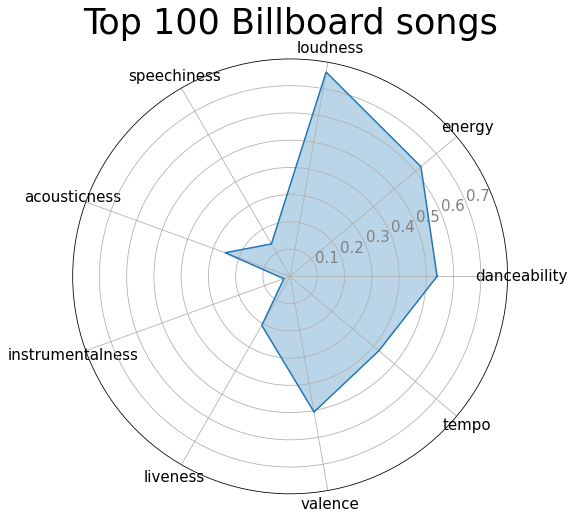

In [46]:
# plot size
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_billboard.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_features_billboard.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*np.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

plt.title('Top 100 Billboard songs', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

## How do the billboard songs compare to the grammy songs and african songs


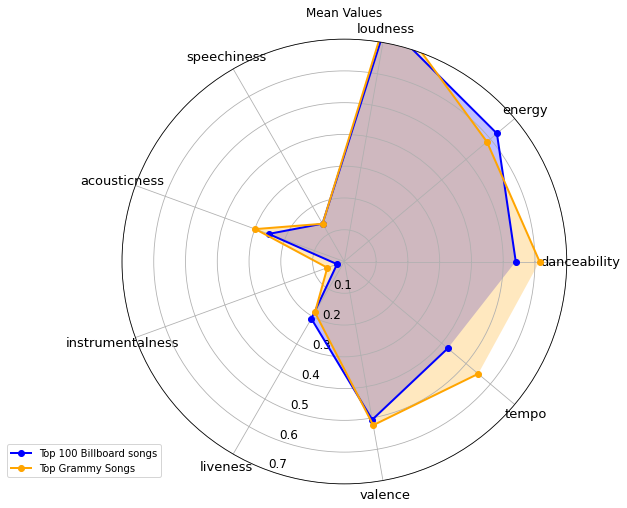

In [47]:
#Are there any differences between the billboard songs and grammy award winning songs from the spotify features?
# plot size
import matplotlib.pyplot as plt
import numpy as np

# fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_billboard.columns)
# number of categories
N=len(categories)
#get the average features
features_top100=music_features_billboard.mean().to_list()
features_grammy=music_features.mean().to_list()

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
# angles=[n/float(N)*2*np.pi for n in range(N)]
# angles+=angles[:1]
angles=np.linspace(0,2*np.pi,N,endpoint=False)
fig=plt.figure(figsize=(18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features_top100, 'o-', linewidth=2, label = "Top 100 Billboard songs", color= 'blue')
ax.fill(angles, features_top100, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, categories , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_grammy, 'o-', linewidth=2, label = "Top Grammy Songs", color= 'orange')
ax.fill(angles, features_grammy, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

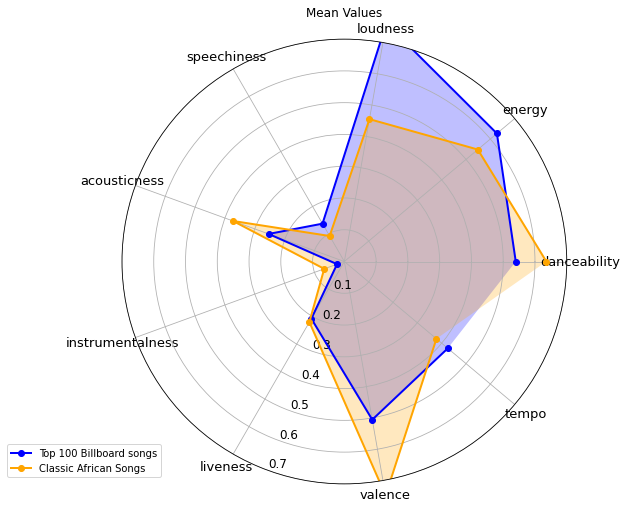

In [48]:
#Are there any differences between the billboard songs and african classic songs from the spotify features?
# plot size
import matplotlib.pyplot as plt
import numpy as np

# fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_billboard.columns)
# number of categories
N=len(categories)
#get the average features
features_billboard=music_features_billboard.mean().to_list()
features_classicAfrican=music_features_top100.mean().to_list()

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
# angles=[n/float(N)*2*np.pi for n in range(N)]
# angles+=angles[:1]
angles=np.linspace(0,2*np.pi,N,endpoint=False)
fig=plt.figure(figsize=(18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features_billboard, 'o-', linewidth=2, label = "Top 100 Billboard songs", color= 'blue')
ax.fill(angles, features_billboard, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, categories , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_classicAfrican, 'o-', linewidth=2, label = "Classic African Songs", color= 'orange')
ax.fill(angles, features_classicAfrican, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

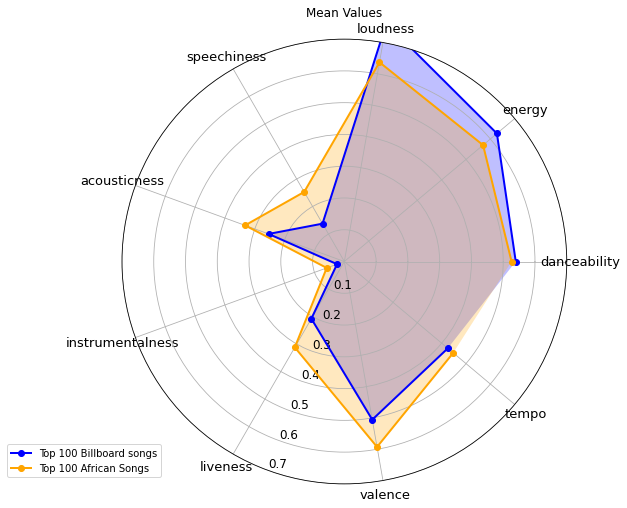

In [49]:
#Are there any differences between the billboard songs and top 100 african songs from the spotify features?
# plot size
import matplotlib.pyplot as plt
import numpy as np

# fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_features_billboard.columns)
# number of categories
N=len(categories)
#get the average features
features_billboard=music_features_billboard.mean().to_list()
features_boomplay=music_features_african.mean().to_list()

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
# angles=[n/float(N)*2*np.pi for n in range(N)]
# angles+=angles[:1]
angles=np.linspace(0,2*np.pi,N,endpoint=False)
fig=plt.figure(figsize=(18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features_billboard, 'o-', linewidth=2, label = "Top 100 Billboard songs", color= 'blue')
ax.fill(angles, features_billboard, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, categories , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_boomplay, 'o-', linewidth=2, label = "Top 100 African Songs", color= 'orange')
ax.fill(angles, features_boomplay, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [ ]:
#Insights
from scipy.stats import ttest_ind
import numpy as np

boomplay_mean=